In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mdshare
import pyemma
# for visualization of molecular structures:
import nglview
import mdtraj 
from threading import Timer
from nglview.player import TrajectoryPlayer
from pyemma.util.contexts import settings

## Align the trajectories

## Loading the data

In [2]:
files = ['prot_corrected_fit_aligned_a5.1_01_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_02_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_03_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_04_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_05_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_06_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_07_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_08_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_09_10skips.xtc', 'prot_corrected_fit_aligned_a5.1_010_10skips.xtc']

### distances between Ca's

In [3]:
distances_ca_feat = pyemma.coordinates.featurizer('prot_only-firstframe_a5.1_01.gro') 
distances_ca_feat.add_distances_ca(excluded_neighbors=2, periodic=False) 
distances_ca_data = pyemma.coordinates.load(files, features=distances_ca_feat)
# labels += ['C\u03B1 Atom\nDistances']

Obtaining file info:   0%|                                                                                    …

getting output of FeatureReader:   0%|                                                                        …

In [4]:
len(distances_ca_data[0][0])

253

***

## Ca distance

### TICA

In [5]:
# lag time of 10 ns was chosen
tica_dist_ca = pyemma.coordinates.tica(distances_ca_data, lag=100)
tica_output_dist_ca = tica_dist_ca.get_output()
tica_concatenated_dist_ca = np.concatenate(tica_output_dist_ca)

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [6]:
tica_concatenated_dist_ca.shape

(100010, 86)

In [7]:
type(tica_output_dist_ca)

list

/var/folders/7q/bqjcz0h95q9f9qnzd15n6p8w0000gq/T/ipykernel_23950/4197819240.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


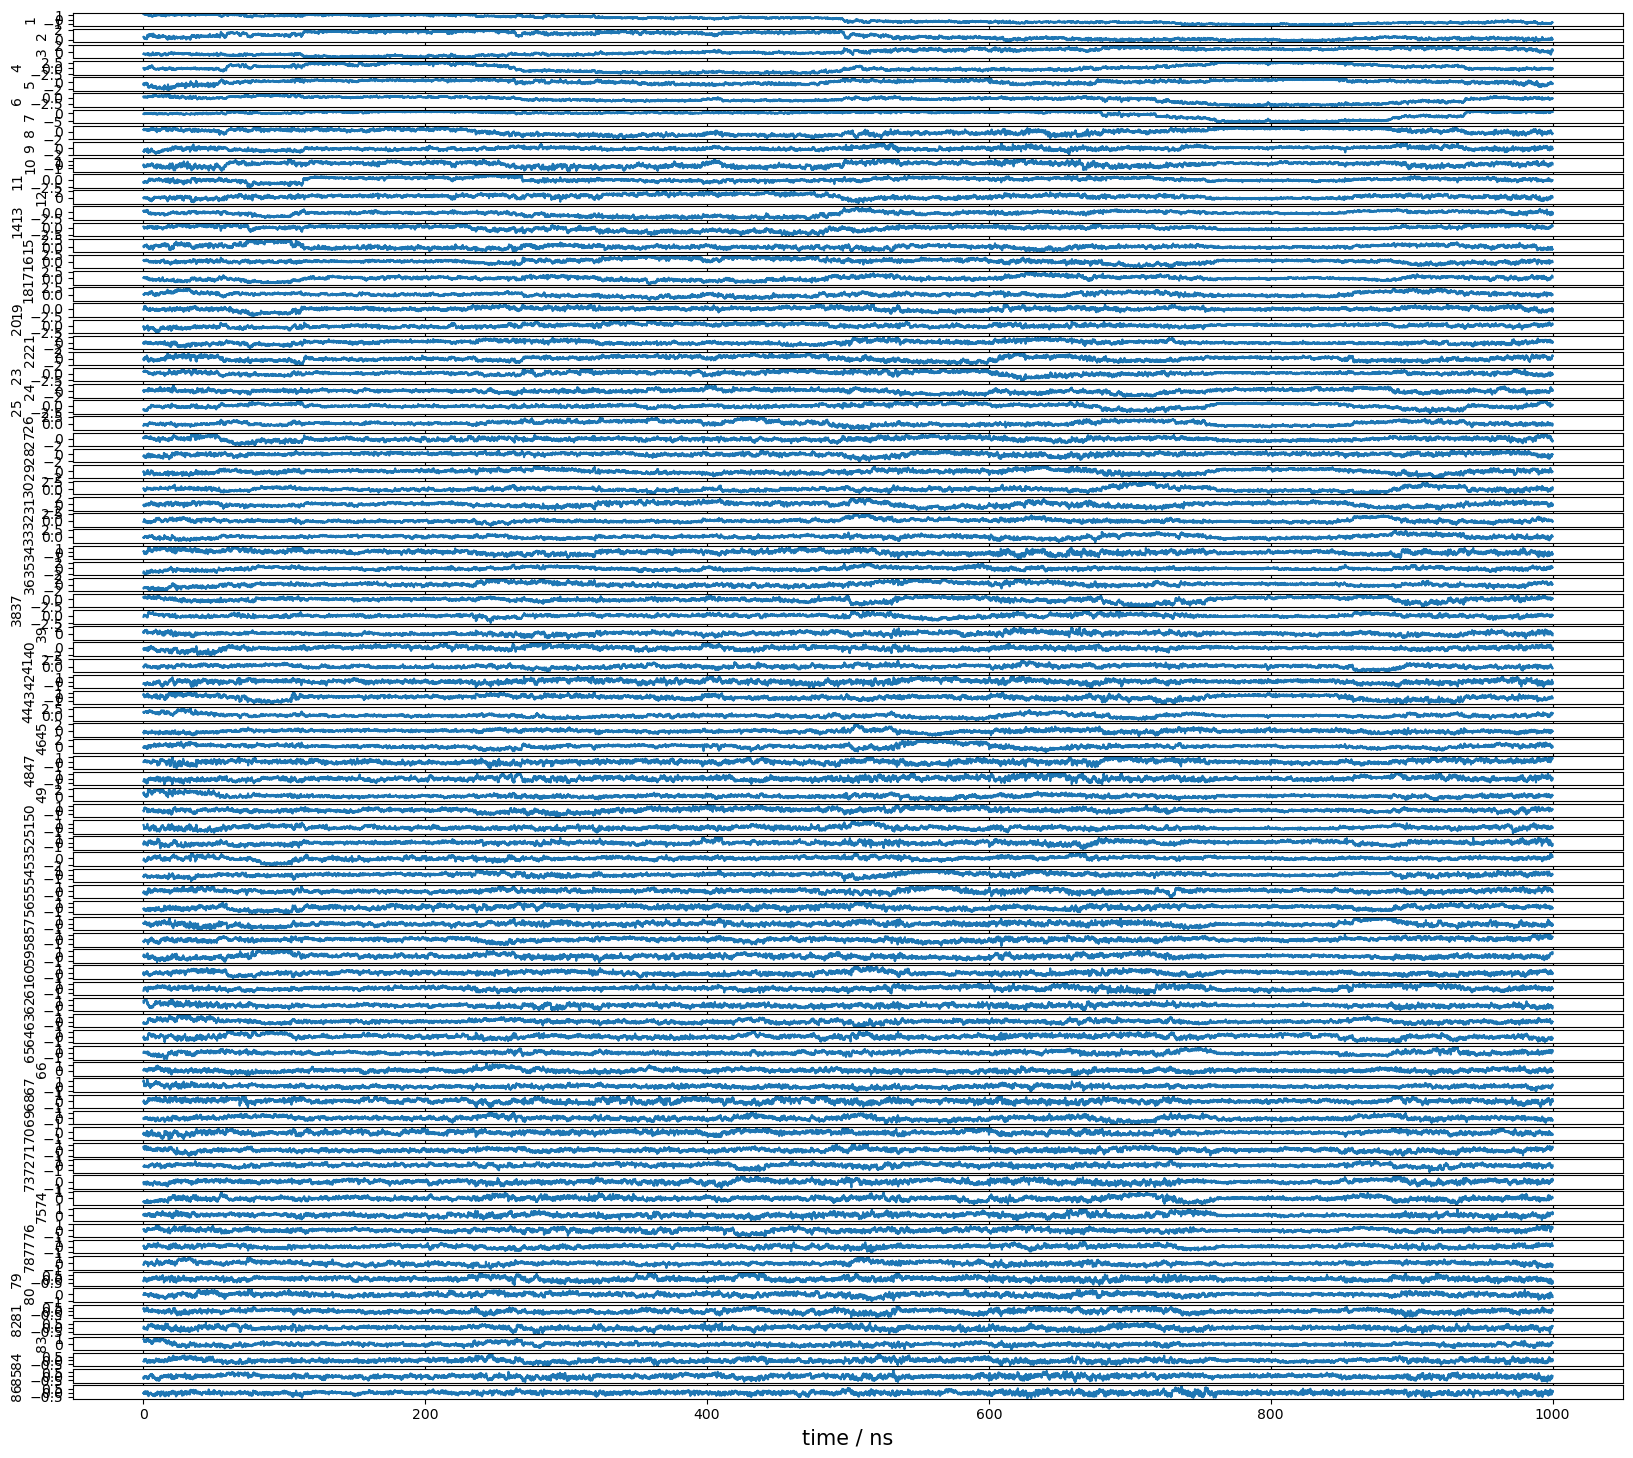

In [9]:
fig, axes = plt.subplots(86, 1, figsize=(20, 18), sharex=True)
x = 0.1 * np.arange(tica_output_dist_ca[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output_dist_ca[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('{}'.format(i + 1), fontsize=10)
axes[-1].set_xlabel('time / ns', fontsize=15)
fig.tight_layout()
plt.savefig('Trajectories - TICA ca_dist', dpi=300)
plt.savefig('Trajectories - TICA ca_dist.pdf', dpi=300)

### Discretization

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:28 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[24] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:29 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[60] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:30 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[124] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:30 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[172] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4
17-10-23 12:01:31 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[180] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:31 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[236] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:33 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[308] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:35 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[440] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:36 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[500] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:36 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[516] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:37 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[524] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9
17-10-23 12:01:37 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[532] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:38 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[600] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:39 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[652] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:39 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[664] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:40 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[716] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:41 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[760] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:42 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[776] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9
17-10-23 12:01:42 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[780] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9
17-10-23 12:01:42 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[784] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:42 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[800] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:01:55 pyemma.coordinates.clustering.kmeans.KmeansClustering[1389] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

17-10-23 12:02:00 pyemma.coordinates.clustering.kmeans.KmeansClustering[1581] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.


/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 50 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"
/Users/erollab

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans inste

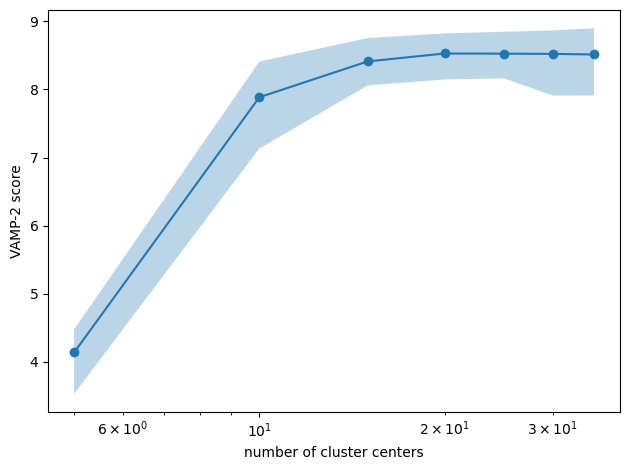

In [10]:
#previosly we chose lag time of 6ns
n_clustercenters = [5, 10, 15, 20, 25, 30, 35]

scores = np.zeros((len(n_clustercenters), 100))
for n, k in enumerate(n_clustercenters):
    for m in range(100):
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output_dist_ca, k=k, max_iter=50, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 100)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.tight_layout()
plt.savefig('VAMP2 score|num of cluster centers - ca_dist', dpi=300)
plt.savefig('VAMP2 score|num of cluster centers - ca_dist.pdf', dpi=300)

In [13]:
#20 cluster centers
cluster_dist_ca = pyemma.coordinates.cluster_kmeans(
    tica_output_dist_ca, k=20, max_iter=50, stride=10, fixed_seed=False)
dtrajs_concatenated_dist_ca = np.concatenate(cluster_dist_ca.dtrajs)

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from /Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

getting output of KmeansClustering:   0%|                                                                     …

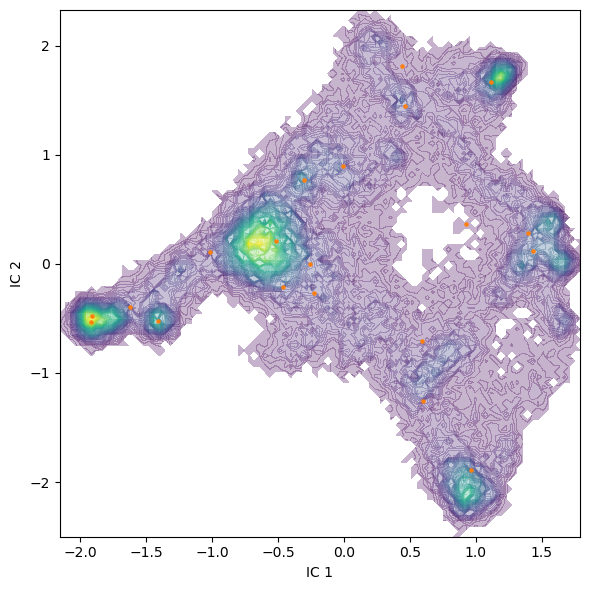

In [14]:
#20 cluster centers
fig, ax = plt.subplots(figsize=(6, 6))
pyemma.plots.plot_density(
    *tica_concatenated_dist_ca[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster_dist_ca.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('centers on the TICA dimensions - dist_ca - 20 centers', dpi=300)
plt.savefig('centers on the TICA dimensions - dist_ca - 20 centers.pdf', dpi=300)

In [15]:
cluster_dist_ca

KmeansClustering(clustercenters=array([[-1.62515e+00, -3.99068e-01, ..., -7.07546e-04,  3.47295e-03],
       [-3.05519e-01,  7.65186e-01, ...,  1.26378e-02,  1.01265e-02],
       ...,
       [-1.90957e+00, -4.74155e-01, ..., -1.02160e-02, -1.35104e-02],
       [-1.92201e+00, -5.33886e-01, ..., -9.21442e-03, -1.54397e-02]],
      dtype=float32),
         fixed_seed=1493157365, init_strategy='kmeans++', keep_data=False,
         max_iter=50, metric='euclidean', n_clusters=20, n_jobs=8,
         oom_strategy='memmap', skip=0, stride=10, tolerance=1e-05)

### MSM estimation and validation 

### Implied timescales

estimating BayesianMSM:   0%|                                                                                 …

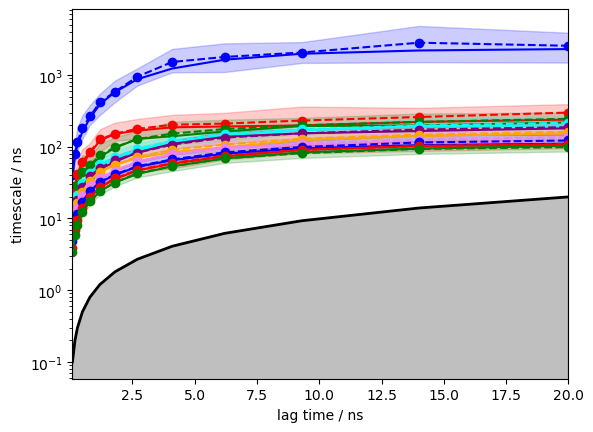

In [16]:
its_dist_ca = pyemma.msm.its(cluster_dist_ca.dtrajs, lags=200, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its_dist_ca, units='ns', dt=0.1);
plt.savefig('ITS - dist_ca - 20 cluster centers', dpi=300)
plt.savefig('ITS - dist_ca - 20 cluster centers.pdf', dpi=300)

In [17]:
#I'm going for lag time of 7 ns from this point onward
msm_dist_ca = pyemma.msm.bayesian_markov_model(cluster_dist_ca.dtrajs, lag=70, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm_dist_ca.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm_dist_ca.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[2811]: Sampling MSMs:   0%|                                    …

fraction of states used = 1.00
fraction of counts used = 1.00


In [18]:
msm_dist_ca

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=70,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=4, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

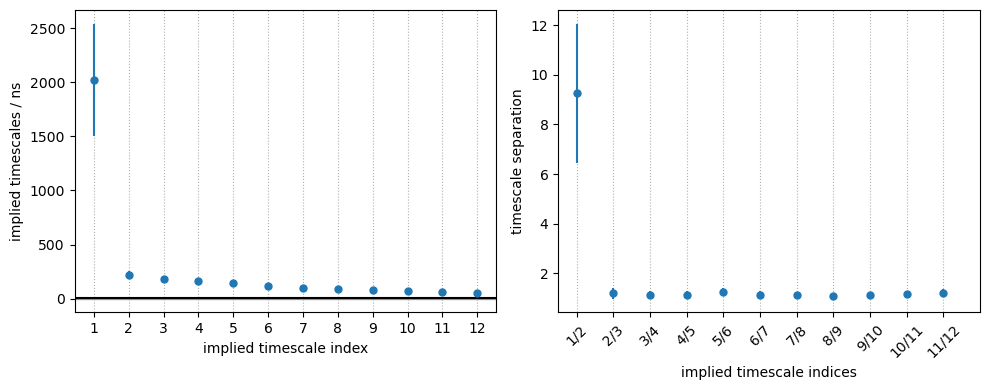

In [19]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 12

timescales_mean_dist_ca = msm_dist_ca.sample_mean('timescales', k=nits)
timescales_std_dist_ca = msm_dist_ca.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean_dist_ca,
    yerr=timescales_std_dist_ca,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean_dist_ca[:-1] / timescales_mean_dist_ca[1:],
    yerr=its_separation_err(
        timescales_mean_dist_ca,
        timescales_std_dist_ca),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm_dist_ca.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm_dist_ca.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
plt.savefig('examining the implied timescales - dist_ca - lag 7 ns', dpi=300)
plt.savefig('examining the implied timescales - dist_ca - lag 7 ns.pdf', dpi=300)

### Chapman-Kolmogorov test

estimating BayesianMSM:   0%|                                                                                 …

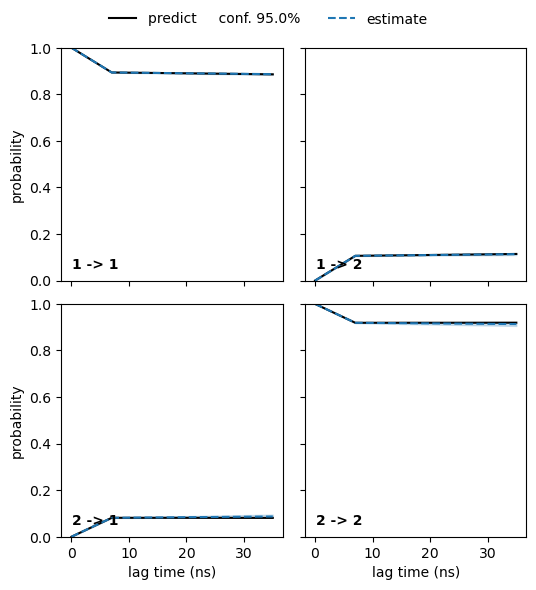

In [20]:
#2 states
nstates_dist_ca = 2
cktest_dist_ca = msm_dist_ca.cktest(nstates_dist_ca, mlags=6)
pyemma.plots.plot_cktest(cktest_dist_ca, dt=0.1, units='ns');
plt.savefig('Chapman-Kolmogorov test - dist_ca - 2 states', dpi=300)
plt.savefig('Chapman-Kolmogorov test - dist_ca - 2 states.pdf', dpi=300)

In [21]:
msm_dist_ca

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=70,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=4, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)

In [22]:
dtrajs_concatenated_dist_ca.shape

(100010,)

/Users/erollab/opt/anaconda3/envs/pyemma/lib/python3.9/site-packages/pyemma/plots/plots2d.py:251: UserWarning: weights_dist_ca=[2.18773798e-06 2.18773798e-06 2.18773798e-06 ... 6.35802345e-06
 6.35802345e-06 6.35802345e-06] is not an allowed optional parameter and will be ignored
  _warn(


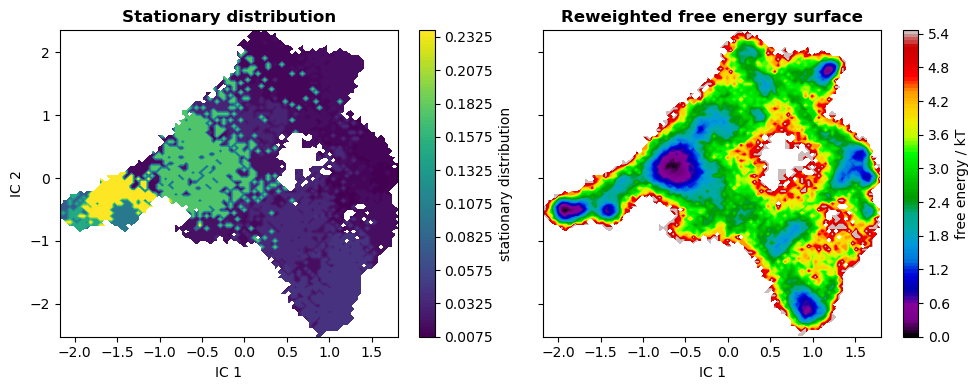

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated_dist_ca[:, :2].T,
    msm_dist_ca.pi[dtrajs_concatenated_dist_ca],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated_dist_ca[:, :2].T,
    weights_dist_ca=np.concatenate(msm_dist_ca.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
plt.savefig('stationary distribution & the free energy - dist_ca', dpi=300)
plt.savefig('stationary distribution & the free energy - dist_ca.pdf', dpi=300)

### Perron cluster cluster analysis

In [24]:
#2 states
msm_dist_ca.pcca(nstates_dist_ca)

PCCA-6490851024:[{'P': array([[9.08819679e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 3.55358292e-03, 1.02014678e-04, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 1.29655441e-02, 6.83666406e-04,
                        0.00000000e+00, 0.00000000e+00, 3.62562571e-05, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 1.87495077e-02, 5.50897494e-02],
                       [0.00000000e+00, 9.50599862e-01, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 1.98067502e-02, 0.00000000e+00, 2.95933881e-02,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                       [0.00000000e+00, 0.00000000e+00, 8.07101331e-01, 9.13391237e-03,
                       

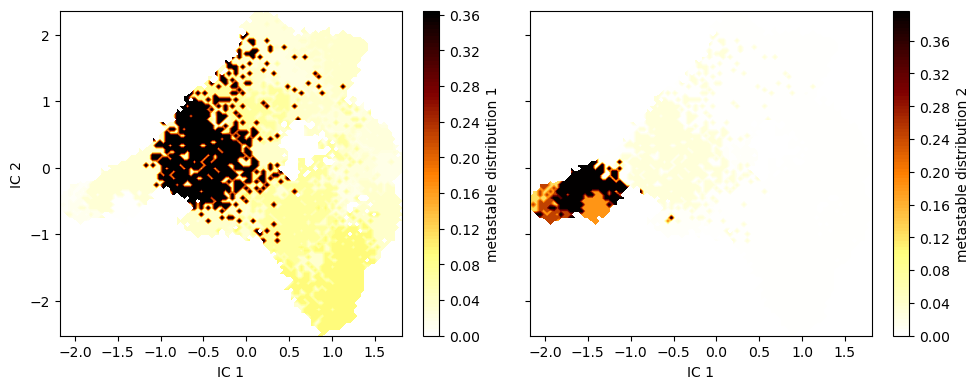

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated_dist_ca[:, :2].T,
        msm_dist_ca.metastable_distributions[i][dtrajs_concatenated_dist_ca],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('PCCA++ membership - dist_ca - for 2 states', dpi=300)
plt.savefig('PCCA++ membership - dist_ca - for 2 states.pdf', dpi=300)

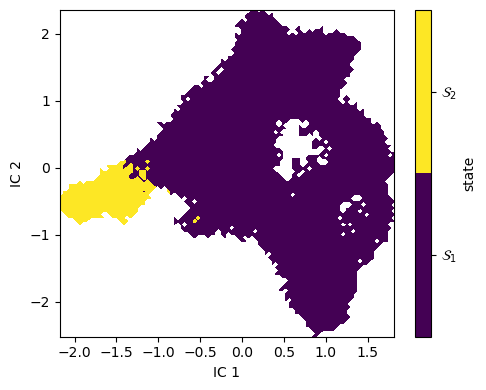

In [26]:
metastable_traj_dist_ca = msm_dist_ca.metastable_assignments[dtrajs_concatenated_dist_ca]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated_dist_ca[:, :2].T, metastable_traj_dist_ca, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates_dist_ca)])
fig.tight_layout()
plt.savefig('PCCA++ on TICA progection - dist_ca - 2 states', dpi=300)
plt.savefig('PCCA++ on TICA progection - dist_ca - 2 states.pdf', dpi=300)

In [27]:
pcca_samples_dist_ca = msm_dist_ca.sample_by_distributions(msm_dist_ca.metastable_distributions, 10)
dist_ca_source = pyemma.coordinates.source(files, features=distances_ca_feat)
pyemma.coordinates.save_trajs(
    dist_ca_source,
    pcca_samples_dist_ca,
    outfiles=['./pcca{}_dist_ca_10samples_3rd_try.pdb'.format(n + 1)
              for n in range(msm_dist_ca.n_metastable)])

Obtaining file info:   0%|                                                                                    …

['./pcca1_dist_ca_10samples_3rd_try.pdb',
 './pcca2_dist_ca_10samples_3rd_try.pdb']

In [28]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm_dist_ca.metastable_sets):
    p_dist_ca = msm_dist_ca.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p_dist_ca, -np.log(p_dist_ca)))

state	π		G/kT
1	0.442341	0.815674
2	0.557659	0.584007


In [29]:
from itertools import product

mfpt_dist_ca = np.zeros((nstates_dist_ca, nstates_dist_ca))
for i, j in product(range(nstates_dist_ca), repeat=2):
    mfpt_dist_ca[i, j] = msm_dist_ca.mfpt(
        msm_dist_ca.metastable_sets[i],
        msm_dist_ca.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt_dist_ca, decimals=2), index=range(1, nstates_dist_ca + 1), columns=range(1, nstates_dist_ca + 1))

MFPT / ns:


,1,2
1,0.00,3085.24
2,3784.24,0.00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
pcca1_ = mpimg.imread('pcca1_dist_ca_3rd.png')
pcca2_ = mpimg.imread('pcca2_dist_ca_3rd.png')

Text(0.5, 1.0, 'State 2')

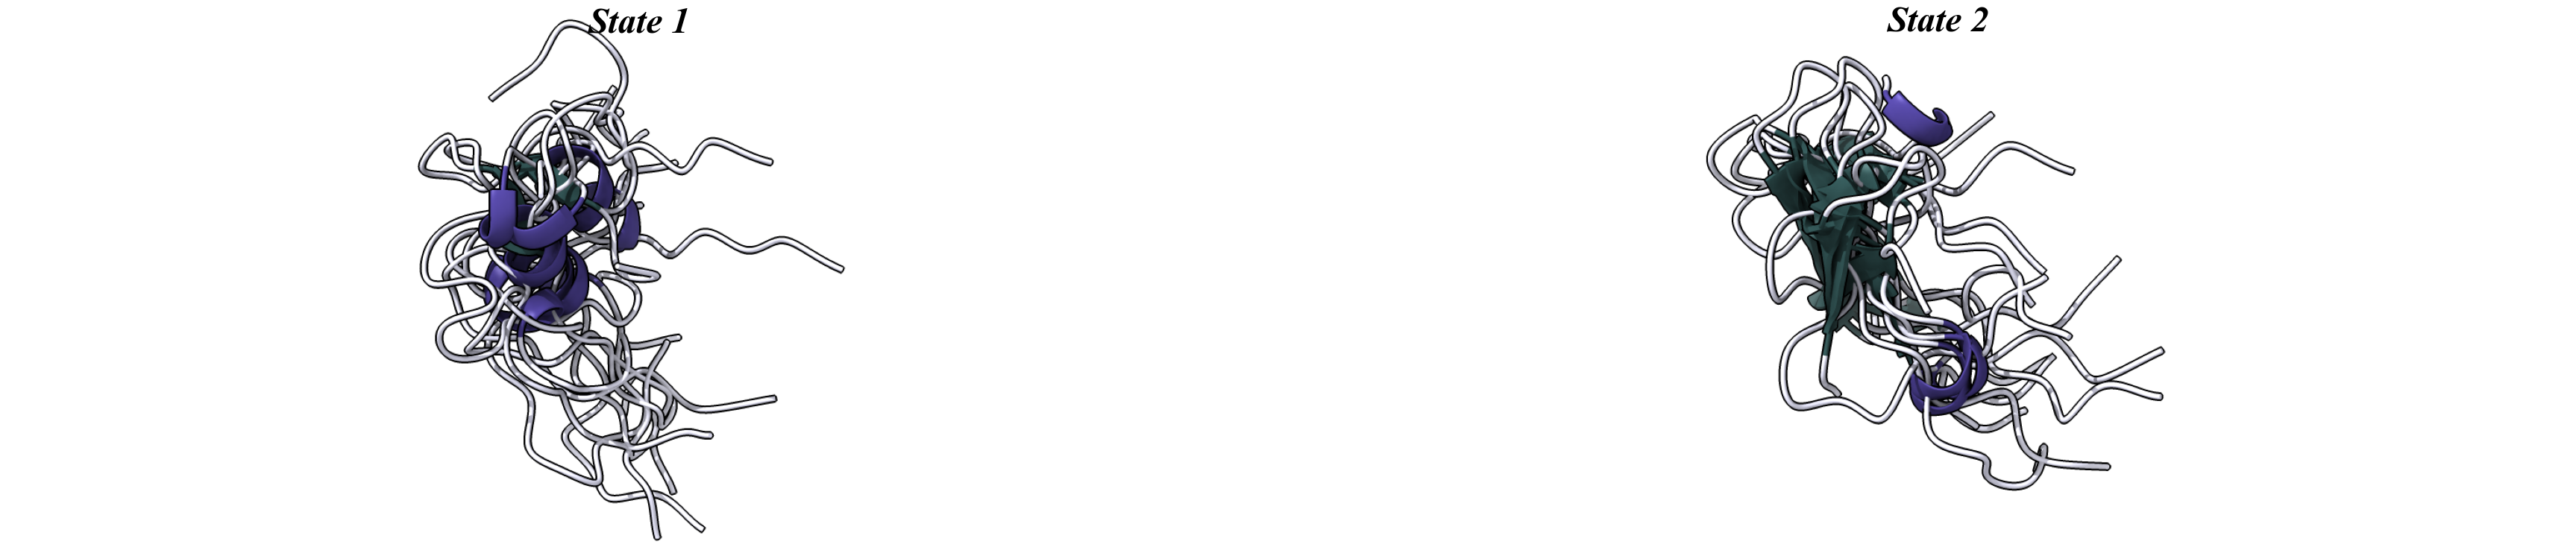

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(35, 15))
plt.rcParams["font.family"] = "Times New Roman"
fig.tight_layout()

#get rid of the axis on the plots/images
for ax in axs.ravel():
    ax.set_axis_off()

axs[0].imshow(pcca1_)
# axs[0,0].axis('off')
axs[0].set_title('State 1', y=1.0, pad=-20, fontsize = 35, fontweight="bold", style = 'italic')

axs[1].imshow(pcca2_)
# axs[0,1].axis('off')
axs[1].set_title('State 2', y=1.0, pad=-20, fontsize = 35, fontweight="bold", style = 'italic')

# axs[2].imshow(pcca3_4ns)
# # axs[0,2].axis('off')
# axs[2].set_title('State 3', y=1.0, pad=-20, fontsize = 35, fontweight="bold", style = 'italic')




### deleting extra plots
#fig.delaxes(axs[2,1])
#fig.delaxes(axs[2,2])

***

## what if we change the lag time?

In [37]:
#I'm going for lag time of 6 ns from this point onward
msm_dist_ca_6ns = pyemma.msm.bayesian_markov_model(cluster_dist_ca.dtrajs, lag=60, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm_dist_ca_6ns.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm_dist_ca_6ns.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[2820]: Sampling MSMs:   0%|                                    …

fraction of states used = 1.00
fraction of counts used = 1.00


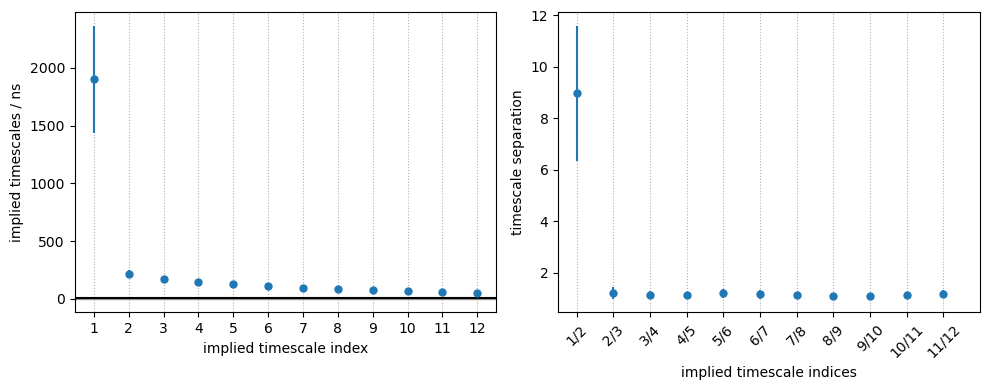

In [31]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 12

timescales_mean_dist_ca = msm_dist_ca_6ns.sample_mean('timescales', k=nits)
timescales_std_dist_ca = msm_dist_ca_6ns.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean_dist_ca,
    yerr=timescales_std_dist_ca,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean_dist_ca[:-1] / timescales_mean_dist_ca[1:],
    yerr=its_separation_err(
        timescales_mean_dist_ca,
        timescales_std_dist_ca),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm_dist_ca_6ns.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm_dist_ca_6ns.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
plt.savefig('examining the implied timescales - dist_ca - lag 6 ns', dpi=300)
plt.savefig('examining the implied timescales - dist_ca - lag 6 ns.pdf', dpi=300)

estimating BayesianMSM:   0%|                                                                                 …

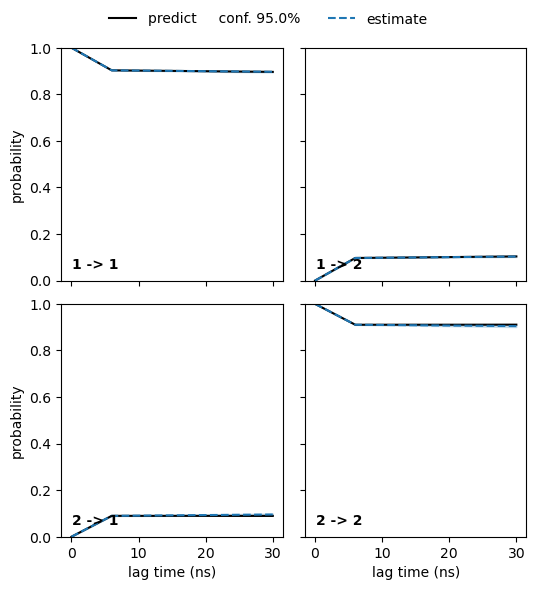

In [41]:
#d states again
nstates_dist_ca_2 = 2
cktest_dist_ca_2 = msm_dist_ca_6ns.cktest(nstates_dist_ca_2, mlags=6)
pyemma.plots.plot_cktest(cktest_dist_ca_2, dt=0.1, units='ns');
plt.savefig('Chapman-Kolmogorov test - dist_ca - 2 states - 6ns', dpi=300)
plt.savefig('Chapman-Kolmogorov test - dist_ca - 2 states - 6ns.pdf', dpi=300)

In [42]:
#2 states
msm_dist_ca_6ns.pcca(nstates_dist_ca_2)

PCCA-6471273728:[{'P': array([[9.19970210e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 3.55359690e-03, 8.93616111e-05, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 1.11724038e-02, 8.18385037e-04,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 1.69365296e-02, 4.74595132e-02],
                       [0.00000000e+00, 9.57657025e-01, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 1.52052259e-02, 0.00000000e+00, 2.71377490e-02,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                       [0.00000000e+00, 0.00000000e+00, 8.25166116e-01, 8.24744378e-03,
                       

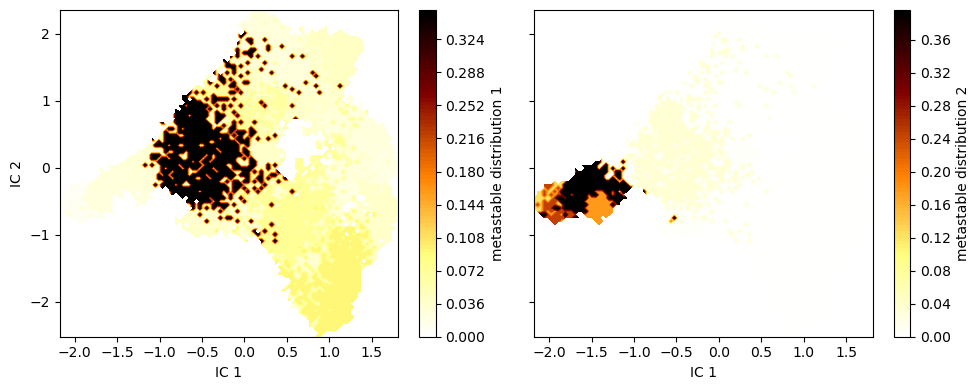

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated_dist_ca[:, :2].T,
        msm_dist_ca_6ns.metastable_distributions[i][dtrajs_concatenated_dist_ca],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('PCCA++ membership - dist_ca - for 2 states - 6ns', dpi=300)
plt.savefig('PCCA++ membership - dist_ca - for 2 states - 6ns.pdf', dpi=300)

In [44]:
#I'm going for lag time of 10 ns from this point onward
msm_dist_ca_10ns = pyemma.msm.bayesian_markov_model(cluster_dist_ca.dtrajs, lag=100, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm_dist_ca_6ns.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm_dist_ca_6ns.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[2827]: Sampling MSMs:   0%|                                    …

fraction of states used = 1.00
fraction of counts used = 1.00


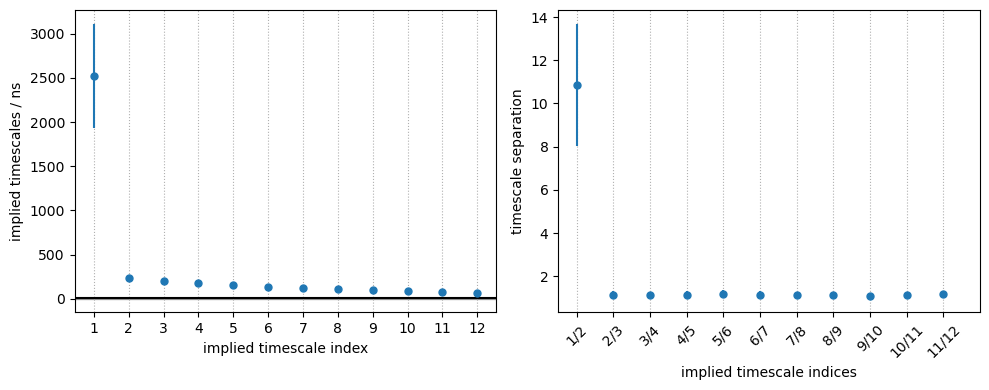

In [45]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 12

timescales_mean_dist_ca = msm_dist_ca_10ns.sample_mean('timescales', k=nits)
timescales_std_dist_ca = msm_dist_ca_10ns.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean_dist_ca,
    yerr=timescales_std_dist_ca,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean_dist_ca[:-1] / timescales_mean_dist_ca[1:],
    yerr=its_separation_err(
        timescales_mean_dist_ca,
        timescales_std_dist_ca),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm_dist_ca_10ns.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm_dist_ca_10ns.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits)],
    rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
plt.savefig('examining the implied timescales - dist_ca - lag 10 ns', dpi=300)
plt.savefig('examining the implied timescales - dist_ca - lag 10 ns.pdf', dpi=300)

estimating BayesianMSM:   0%|                                                                                 …

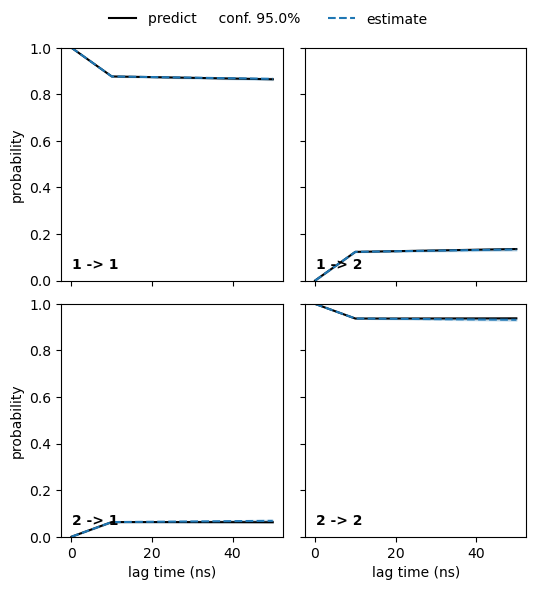

In [46]:
#2 states again
nstates_dist_ca_2_ = 2
cktest_dist_ca_2_ = msm_dist_ca_10ns.cktest(nstates_dist_ca_2_, mlags=6)
pyemma.plots.plot_cktest(cktest_dist_ca_2_, dt=0.1, units='ns');
plt.savefig('Chapman-Kolmogorov test - dist_ca - 2 states - 10ns', dpi=300)
plt.savefig('Chapman-Kolmogorov test - dist_ca - 2 states - 10ns.pdf', dpi=300)

In [47]:
#2 states
msm_dist_ca_10ns.pcca(nstates_dist_ca_2_)

PCCA-6623427456:[{'P': array([[8.76804790e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 3.73279137e-03, 8.94350520e-05, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 1.85663990e-02, 4.70649354e-04,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        1.71787007e-05, 0.00000000e+00, 2.42441230e-02, 7.60746340e-02],
                       [0.00000000e+00, 9.29428372e-01, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 3.12334190e-02, 0.00000000e+00, 3.93382093e-02,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                       [0.00000000e+00, 0.00000000e+00, 7.63704321e-01, 1.66908289e-02,
                       

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated_dist_ca[:, :2].T,
        msm_dist_ca_10ns.metastable_distributions[i][dtrajs_concatenated_dist_ca],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()
plt.savefig('PCCA++ membership - dist_ca - for 2 states - 10ns', dpi=300)
plt.savefig('PCCA++ membership - dist_ca - for 2 states - 10ns.pdf', dpi=300)